# Lab 7 - Cubic Splines
## April 3 - April 5, 2023
## Student 1 Name: $\underline{KANISHK DAD\hspace{3in}}$ Student 1 ID No. $\underline{202103005\hspace{1.5in}}$
## Student 2 Name: $\underline{ADITYA TANNA\hspace{3in}}$ Student 2 ID No. $\underline{202103023\hspace{1.5in}}$
## Student 3 Name: $\underline{VRAJ THAKKAR\hspace{3in}}$ Student 3 ID No. $\underline{202103052\hspace{1.5in}}$
## Date of Submission: $\underline{05/04/23}$
***

In [4]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `myUL` that takes in a matrix  $A \in \mathbb{R}^{n \times n}$, and returns the permutation matrix $P$, upper triangular matrix $U$ and lower triangular matrix $L$ such that $PA = UL$. (*this is not a typo*)

> Indented block



In [5]:
### PA=UL factorization
### def myUL(A):
import numpy as np

def myUL(A):
    n = A.shape[0]   # get the size of matrix A
    L = np.eye(n)    # initialize L as identity matrix
    U = A.copy()     # copy A into U
    P = np.eye(n)    # initialize P as identity matrix
    
    for j in range(n):
        # partial pivoting
        row = np.argmax(np.abs(U[j:, j])) + j
        if row != j:
            U[[j, row], :] = U[[row, j], :]
            P[[j, row], :] = P[[row, j], :]
            if j >= 1:
                L[[j, row], :j] = L[[row, j], :j]
        
        # elimination
        for i in range(j+1, n):
            L[i, j] = U[i, j] / U[j, j]
            U[i, :] = U[i, :] - L[i, j] * U[j, :]
    
    return P, L, U


### Q.1(a) Print examples of matrices A with matrices P,L and U such that PA = UL, with a verification for PA=UL.

In [29]:
### Examples of A and factors P,U,L.

A = np.array([[4, 3, 1], [6, 3, 4], [2, 1, 8]])
# A = np.array([[5, 3, 1], 
#               [3, 3, 1], 
#               [1, 1, 1]])


# Perform LU decomposition with partial pivoting
P, L, U = myUL(A)

# Print the permutation matrix P
print("Permutation matrix P:")
print(P)

# Print the lower triangular matrix L
print("\nLower triangular matrix L:")
print(L)

# Print the upper triangular matrix U
print("\nUpper triangular matrix U:")
print(U)

# Verify that PA = UL
print("\nPA - UL =")
print(np.matmul(P, A) - np.matmul(U, L))




Permutation matrix P:
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

Lower triangular matrix L:
[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.         1.        ]]

Upper triangular matrix U:
[[ 6  3  4]
 [ 0  1 -1]
 [ 0  0  6]]

PA - UL =
[[-3.33333333  0.          0.        ]
 [ 3.66666667  2.          2.        ]
 [ 0.          1.          2.        ]]


***
### Q.2 Let us now use the above PA=UL factorization to compute inverse of a given matrix. Write a function `mymatinverse` that takes in a matrix $A \in \mathbb{R}^{n\times n}$ uses the above function to obtain the factorization: $PA = UL$, and find whether the matrix $A$ is invertible or not, and if it is, it should return the inverse computed by back/forward substitution.

In [27]:
### Compute Inverse of Matrix using UL decomposition and back/forward substitution
### def mymatinverse(A):


def myInverse(A):
    P, L, U = myUL(A)#taking the P,L and U found from the previous function
    n = A.shape[0] #we initialize all the matrices as zero matrices 
    U_inverse = np.zeros((n, n))
    L_inverse = np.zeros((n, n))
    A_inverse = np.zeros((n, n))
    
    
    # Compute inverse of U
    for i in range(n-1, -1, -1):
        U_inverse[i,i] = 1.0 / U[i,i]
        for j in range(i):
            s = sum(U[j,k]*U_inverse[k,i] for k in range(j+1, n))
            U_inverse[j,i] = -s / U[j,j]
    
    # Compute inverse of L
    for i in range(n):
        L_inverse[i,i] = 1.0 / L[i,i]
        for j in range(i+1, n):
            s = sum(L[j,k]*L_inverse[k,i] for k in range(j))
            L_inverse[j,i] = -s / L[j,j]
    
    # Compute inverse of A
    A_inverse = np.dot(L_inverse, U_inverse)
    A_inverse = np.dot(A_inverse, P)
    
    return A_inverse





### Q.2(a) Print a few examples of matrices $A$ and their inverses, and verify the correctness of the inverse by computing $A\cdot A^{-1}$

In [28]:
### Examples of A and A^{-1}



# A = np.array([[-1,0,3],[-2,-2,7],[-5,0,20]])
# A = np.array([[1,-4],[3,5]]) 
A = np.array([[5, 3, 1], 
              [3, 3, 1], 
              [1, 1, 1]])
P, L, U = myUL(A)
A_inverse = myInverse(A)
print(A_inverse)
print(np.matmul(A,A_inverse)) # compute the product between the two matrices. It will return Identity matrix I if the inverse is correct.




[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


<ipython-input-27-7659663bfd49>:15: RuntimeWarning: divide by zero encountered in true_divide
  U_inverse[i,i] = 1.0 / U[i,i]
<ipython-input-27-7659663bfd49>:17: RuntimeWarning: invalid value encountered in multiply
  s = sum(U[j,k]*U_inverse[k,i] for k in range(j+1, n))


### Q.3 Using the above function to compute inverse of a matrix, draw a closed cubic spline curve through points given by the user, as implemented in the previous lab.

In [32]:

def find_next_indexes(x, array):
    nxt_small = None
    nxt_big = None
    for i in range(len(array)):
        if array[i] < x:
            if nxt_small is None or array[i] > array[nxt_small]:
                nxt_small = i
        elif array[i] > x:
            if nxt_big is None or array[i] <= array[nxt_big]:
                nxt_big = i
    if nxt_small == None:
        nxt_small = 0
    
    return nxt_small, nxt_big

In [33]:
# Functions that Evaluate the S(x) = P(x)_i , where i=0, 1, 2, .., n-1
def evaluate(val, coeff, data_points):
    p, p1 = find_next_indexes(val,data_points)#finding the next indices for the data points
    polynomial = coeff[p,:] # function that returns you the coefficients of the for the P(x)_i for a given value of x
    eval = (polynomial[0] + (polynomial[1] * val) + (polynomial[2] * (val**2)) + (polynomial[3] * (val**3)))    
    return eval

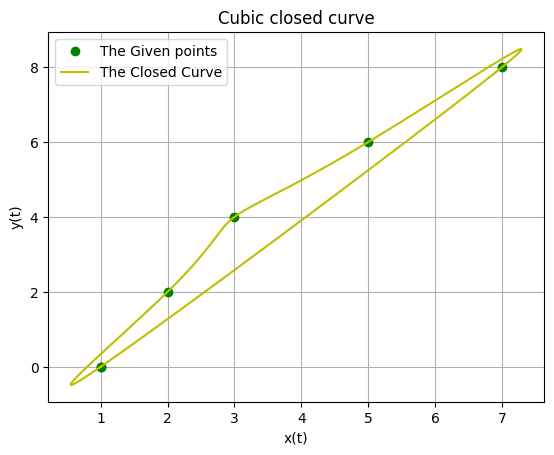

In [34]:
### def mycubicsplineclosedcurve(x,y):

### Planar Closed Cubic Spline curve
### def mycubicclosedcurve(x,y):
def mycubicclosedcurve(x, y, n): #n being the number of data points
    matrix = np.zeros((4*n,4*n))
    y_finish = [] #taking as an empty array 
    for i in range(n):
        block_matrix = []
        x_p = x[i]
        x_p1 = x[i+1]
        y_finish = np.append(y_finish, [y[i], y[i+1], 0, 0])

        r1 = np.array([1, x_p, x_p**2, x_p**3, 0, 0, 0,0]) # n x 8 
        r2 = np.array([1, x_p1, x_p1**2, x_p1**3, 0, 0, 0,0]) # n x 8
        if(i != n-1):
            r3 = np.array([0, 1, 2*x_p1, 3*(x_p1**2), 0, -1, -2*x_p1, -3*(x_p1**2) ]) # n-1 x 8 
            r4 = np.array([0, 0, 2, 6*x_p1, 0, 0, -2, -6*x_p1 ]) # n-1 x 8

            block_matrix = np.vstack((r1, r2, r3, r4))
            matrix[4*i:4*i+4,4*i:4*i+8] = block_matrix
        else :
            r1 = r1[:4]
            r2 = r2[:4]
            block_matrix = np.vstack((r1, r2))
            matrix[4*i:4*i+2,4*i:4*i+4] = block_matrix 

    matrix[4*n-2:4*n-1,0:4] = np.array([0, 1, 2*x[0], 3*(x[0]**2)])
    matrix[4*n-2:4*n-1,4*n-4:4*n] = np.array([0, -1, -2*x[len(x) - 1], -3*(x[len(x) - 1]**2)])

  
    matrix[4*n-1:4*n,0:4] = np.array([0, 0, 2, 6*x[0] ])
    matrix[4*n-1:4*n,4*n-4:4*n] = np.array([0, 0, -2, -6*x[len(x) - 1]])


    y_finish = np.reshape(y_finish, (4*n,1))

    coefficients = np.linalg.solve(matrix, y_finish)
    coefficients_eval = np.reshape(coefficients, (len(x) - 1,4))
    return coefficients_eval


x = [1,2,3,5,7,1]
y = [0,2,4,6,8,0]
n = len(x)
o = np.linspace(-1, 1, len(x))

# 
v_x = mycubicclosedcurve(o, x, n-1)
v_y = mycubicclosedcurve(o, y, n-1)
v_x = np.reshape(v_x, (n - 1, 4))
v_y = np.reshape(v_y, (n - 1, 4))


points = np.linspace(-1, 1, 1000)
lst1 = []
lst2 = []
#taking two empty lists
for i in range(len(points)):
    lst1 = np.append(lst1, evaluate(points[i], v_x, o))
    lst2 = np.append(lst2, evaluate(points[i], v_y, o))

plt.plot(x, y,'go', label="The Given points")
plt.plot(lst1, lst2, color='y', label="The Closed Curve")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Cubic closed curve")
plt.legend()
plt.grid()
plt.show()






### Q.3(a) Show some examples of closed spline curves passing through user given points.

In [ ]:
### Examples of splines



